<a href="https://colab.research.google.com/github/HaCarrot/HaCarrot/blob/main/Sobel_Method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Задача нахождения горизонта на фотографии с помощью **Open CV**

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

Загрузка изображения

In [2]:
image = cv2.imread('horizont.jpg')

Преобразование изображения в оттенки серого

In [3]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

Вычисление среднего значения яркости для каждой строки

In [4]:
mean_brightness = np.mean(gray, axis=1)

Применение фильтра Собеля для выделения горизонтальных границ

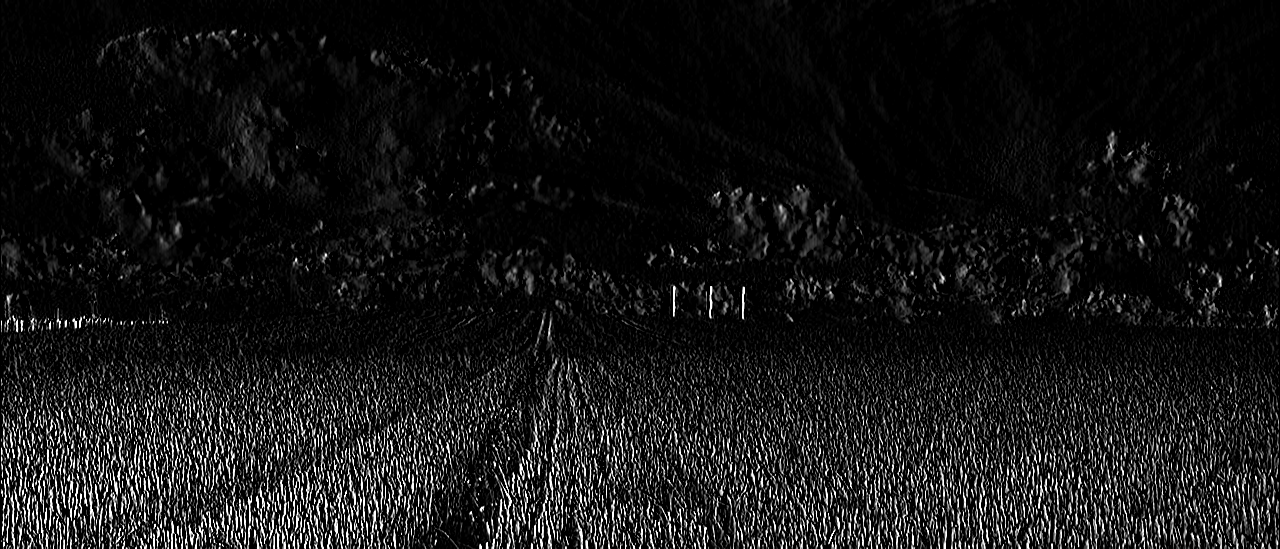

In [5]:
sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
abs_sobelx = np.absolute(sobelx)
mean_gradient = np.mean(abs_sobelx, axis=1)
cv2_imshow(sobelx)

Пороговая обработка для выделения горизонтальных линий

In [21]:
threshold = np.mean(mean_gradient) * 0.35
lines = np.where(mean_gradient < threshold)[0]

Нахождение границ горизонтальной линии

In [22]:
try:
  min_line = np.min(lines)
  max_line = np.max(lines)
  print("Горизонт есть.")
except:
  print("Горизонта нет.")

Горизонт есть.


Визуализация результата (если таковой имеется)

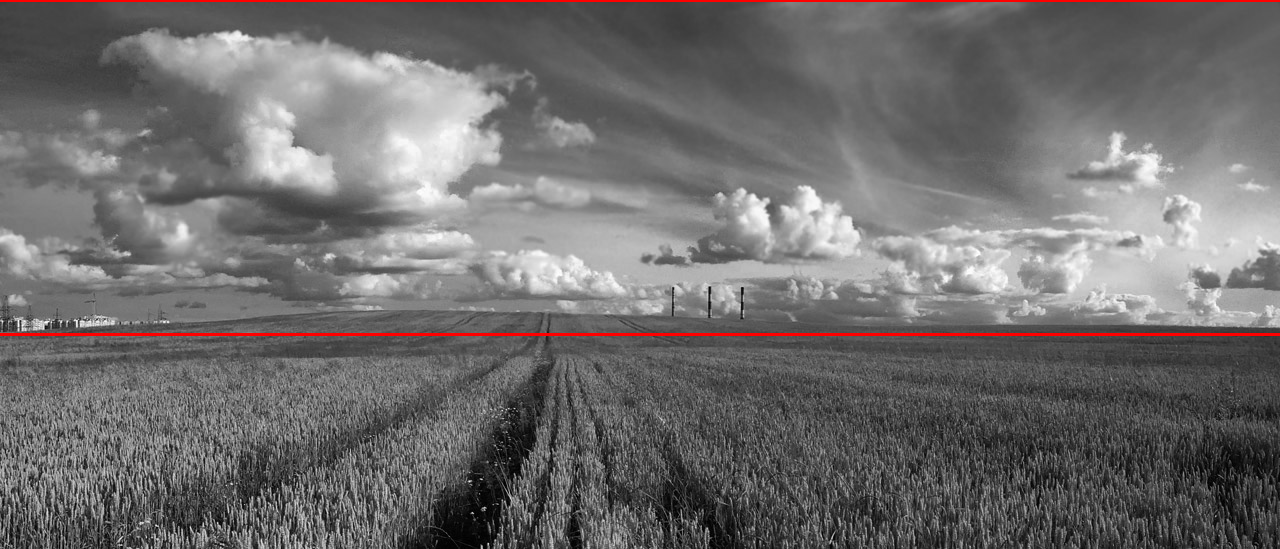

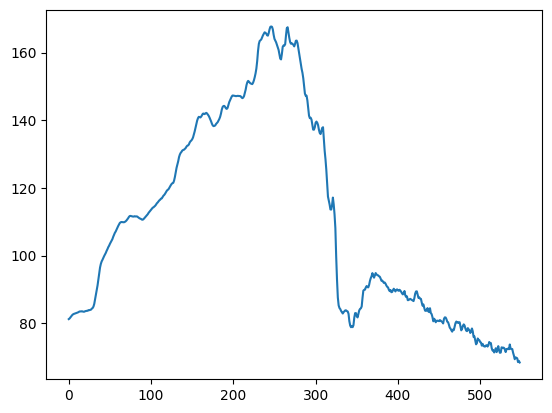

In [23]:
result = cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR)
cv2.line(result, (0, min_line), (result.shape[1], min_line), (0, 0, 255), 2)
cv2.line(result, (0, max_line), (result.shape[1], max_line), (0, 0, 255), 2)
cv2_imshow(result)
plt.plot(mean_brightness)
plt.show()